In [31]:
import math
import pickle
from tqdm.notebook import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from UDFManager import *
from pyudf.rotation import Quaternion

plt.style.use('presentation')

In [20]:
def quaternionToRotationArray(q):
    return [
        [1 - 2 * (q.q2 * q.q2 + q.q3 * q.q3), 2 * (q.q1 * q.q2 + q.q0 * q.q3), 2 * (q.q3 * q.q1 - q.q0 * q.q2)],
        [2 * (q.q1 * q.q2 - q.q0 * q.q3), 1 - 2 * (q.q1 * q.q1 + q.q3 * q.q3), 2 * (q.q2 * q.q3 + q.q0 * q.q1)],
        [2 * (q.q3 * q.q1 + q.q0 * q.q2), 2 * (q.q2 * q.q3 - q.q0 * q.q1), 1 - 2 * (q.q1 * q.q1 - q.q2 * q.q2)]
    ]

In [32]:
all_radians = []
for i in tqdm(range(1, 33)):
    uobj = UDFManager(f'udf/{i:0=2}/output.udf')
    nt = uobj.totalRecord()
    
    radians = np.zeros(nt, dtype=np.float64)
    for n in range(nt):
        uobj.jump(n)
        q = Quaternion(*(uobj.get("Particles[].q"))[0])
        rotation_matrix = quaternionToRotationArray(q)[1]
        radians[n] = np.arccos(rotation_matrix[1])
    all_radians.append(radians)

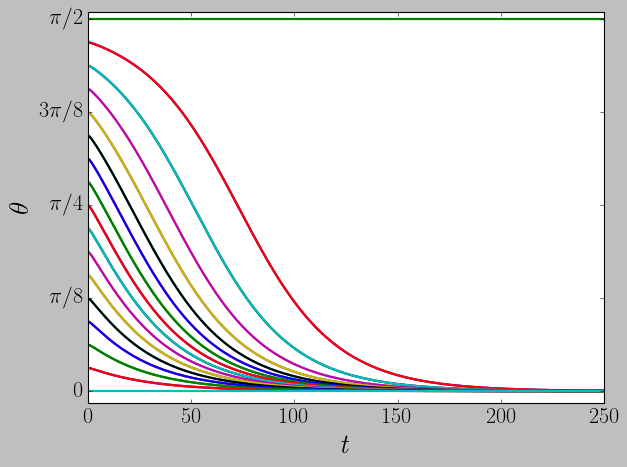

In [33]:
yticks = [d * 2 * np.pi / 8 for d in range(0, 9)]
yticks_str = ['$0$', '$\pi/8$', '$\pi/4$', '$3\pi/8$', '$\pi/2$', '$5\pi/8$','$3\pi/4$', '$7\pi/8$','$\pi$']

plt.xticks(fontsize=20)
plt.yticks(yticks, yticks_str, fontsize=20)
plt.ylim(-0.1, 3.2)
plt.xlabel(r'$\it{t}$', fontsize=25)
plt.ylabel(r'$\it{\theta}$', fontsize=25)

for radians in all_radians:
    plt.plot(radians[:251])

plt.tight_layout()
plt.savefig('figs/00.png')